Saving bank-additional-full.csv to bank-additional-full (8).csv


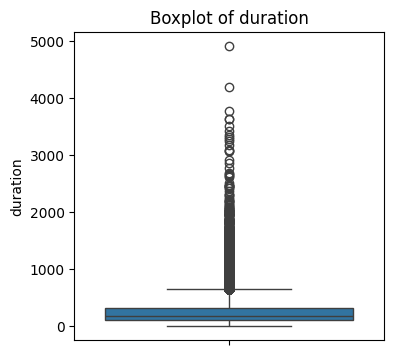

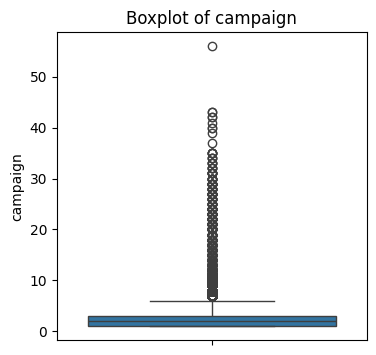

/tmp/ipython-input-3701506391.py:31: FutureWarning: The provided callable <function mean at 0x7bdfd9151c60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('job')['y_yes'].agg(coversion_rate = np.mean, n = np.size)
/tmp/ipython-input-3701506391.py:34: FutureWarning: The provided callable <function mean at 0x7bdfd9151c60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  tmp = df.groupby(col)['y_yes'].agg(conversion_rate = np.mean, n = np.size)
/tmp/ipython-input-3701506391.py:34: FutureWarning: The provided callable <function mean at 0x7bdfd9151c60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  tmp = df.


=== job ===
               conversion_rate      n
job                                  
student               0.314286    875
retired               0.252326   1720
unemployed            0.142012   1014
admin.                0.129726  10422
management            0.112175   2924
unknown               0.112121    330
technician            0.108260   6743
self-employed         0.104856   1421
housemaid             0.100000   1060
entrepreneur          0.085165   1456
services              0.081381   3969
blue-collar           0.068943   9254

=== marital ===
          conversion_rate      n
marital                         
unknown          0.150000     80
single           0.140041  11568
divorced         0.103209   4612
married          0.101573  24928

=== education ===
                     conversion_rate      n
education                                  
illiterate                  0.222222     18
unknown                     0.145003   1731
university.degree           0.137245  12168
p

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

df = pd.read_csv('bank-additional-full.csv', sep= ";", low_memory=False)
df.describe()
# --> Các biến numeric: age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
# --> Các biến có outliers: duration (max 4918), campaign (max 56)
# Các việc cần làm tiếp: (1) 2 case outliers (duration, campaign) vẫn có thể là business thực tế --> không loại, chỉ vẽ đồ thị biểu diễn; (2) Group 'pdays' do có 999: never contact

# Vẽ chart biểu thị 2 case outliers (duration, campaign)
import matplotlib.pyplot as plt
import seaborn as sns
for col in ['duration', 'campaign']:
  plt.figure(figsize=(4,4))
  sns.boxplot(y = df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()
## Quá nhiều outlier, group thôi
df['duration_group'] = pd.cut(df['duration'], bins= [0, 60, 300, 900, 5000], labels= ['0 to 60', '61 to 300', '301 to 900', '901 - 5000'], right=True, include_lowest=True)
df['campaign_group'] = pd.cut(df['campaign'], bins= [df['campaign'].min(), 10, 30, 40, df['campaign'].max()], labels= ['1 to 10', '11 to 30', '30 to 40', '> 40'], right=True, include_lowest=True)
df.head()

# Group 'pdays'
df['pdays_group'] = df['pdays'].replace(999, 'never contact')
df.loc[df['pdays'] != 999, 'pdays_group'] = pd.cut(df['pdays'], bins = [df['pdays'].min(), 10, 20, df['pdays'].max()], labels= ['< 10d', '11 to 20d', '> 20d'], right=True, include_lowest=True)

# Xử lý 10 cột category còn lại: Tính conversion rate theo group của từng cột
import numpy as np
df['y_yes'] = (df['y'] == 'yes').astype(int)
df.groupby('job')['y_yes'].agg(coversion_rate = np.mean, n = np.size)

def conversion_rate_by(col):
  tmp = df.groupby(col)['y_yes'].agg(conversion_rate = np.mean, n = np.size)
  tmp = tmp.sort_values('conversion_rate', ascending=False)
  print(f"\n=== {col} ===")
  print(tmp)
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for c in cat_cols:
  conversion_rate_by(c)

# Export data
df.to_csv('bank-additional-full_cleaned.csv', index=False)
files.download('bank-additional-full_cleaned.csv')